# "Performance Comparison of Multilinear Regression, Random Forest, and Decision Tree Models on the Profit Prediction Dataset"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
df=pd.read_csv("profit_prediction_dataset.csv")
df

,Brand,Units_Sold,Marketing_Spend,Profit
0,Brand A,202,4058,8665
1,Brand B,535,2938,6405
2,Brand E,960,2573,5643
3,Brand C,370,3629,7552
4,Brand A,206,4187,8726
...,...,...,...,...
6995,Brand B,633,2169,4768
6996,Brand A,791,1892,4318
6997,Brand A,466,1952,4378
6998,Brand B,940,2254,5298


In [ ]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Brand            7000 non-null   object
 1   Units_Sold       7000 non-null   int64 
 2   Marketing_Spend  7000 non-null   int64 
 3   Profit           7000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 218.9+ KB


In [ ]:
# Display the shape of the dataset
df.shape

(7000, 4)

In [ ]:
# Display descriptive statistics
df.describe()

,Units_Sold,Marketing_Spend,Profit
count,7000.000000,7000.000000,7000.000000
mean,553.700429,2990.911571,6537.285429
std,261.353620,1160.386259,2348.971202
min,100.000000,1001.000000,1863.000000
25%,325.750000,1985.750000,4523.000000
50%,554.000000,2968.500000,6511.000000
75%,778.000000,4009.000000,8568.250000
max,1359.000000,4999.000000,11265.000000


In [ ]:
df.isnull()

,Brand,Units_Sold,Marketing_Spend,Profit
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
6995,False,False,False,False
6996,False,False,False,False
6997,False,False,False,False
6998,False,False,False,False


In [ ]:
df.count()

Brand              7000
Units_Sold         7000
Marketing_Spend    7000
Profit             7000
dtype: int64

In [ ]:
# Check for missing values
df.isnull().sum()

Brand              0
Units_Sold         0
Marketing_Spend    0
Profit             0
dtype: int64

In [ ]:
# Check for duplicated rows
df.duplicated().sum()

0

In [ ]:
# Drop the "Brand" column
df.drop("Brand",axis=1,inplace=True)

In [ ]:
df

,Units_Sold,Marketing_Spend,Profit
0,202,4058,8665
1,535,2938,6405
2,960,2573,5643
3,370,3629,7552
4,206,4187,8726
...,...,...,...
6995,633,2169,4768
6996,791,1892,4318
6997,466,1952,4378
6998,940,2254,5298


In [ ]:
# Display the correlation matrix
df.corr()

,Units_Sold,Marketing_Spend,Profit
Units_Sold,1.000000,-0.029245,0.079487
Marketing_Spend,-0.029245,1.000000,0.986473
Profit,0.079487,0.986473,1.000000


In [ ]:
# Display the skewness of the dataset
df.skew()

Units_Sold        -0.007898
Marketing_Spend    0.024954
Profit             0.023839
dtype: float64

In [ ]:
# Display the mean of the dataset
df.mean()

Units_Sold          553.700429
Marketing_Spend    2990.911571
Profit             6537.285429
dtype: float64

In [ ]:
# Display the median of the dataset
df.median()

Units_Sold          554.0
Marketing_Spend    2968.5
Profit             6511.0
dtype: float64

In [ ]:
# Display the first few rows of the dataset
df.head()

,Units_Sold,Marketing_Spend,Profit
0,202,4058,8665
1,535,2938,6405
2,960,2573,5643
3,370,3629,7552
4,206,4187,8726


In [ ]:
# Display the last few rows of the dataset
df.tail()

,Units_Sold,Marketing_Spend,Profit
6995,633,2169,4768
6996,791,1892,4318
6997,466,1952,4378
6998,940,2254,5298
6999,842,1783,4174


<Axes: xlabel='Units_Sold', ylabel='Profit'>

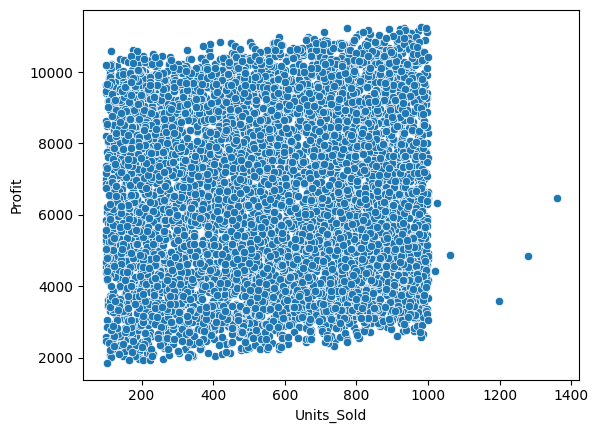

In [ ]:
# Scatter plot of "Units_Sold" vs "Profit"
sns.scatterplot(x="Units_Sold",y="Profit",data=df)

<Axes: xlabel='Marketing_Spend', ylabel='Profit'>

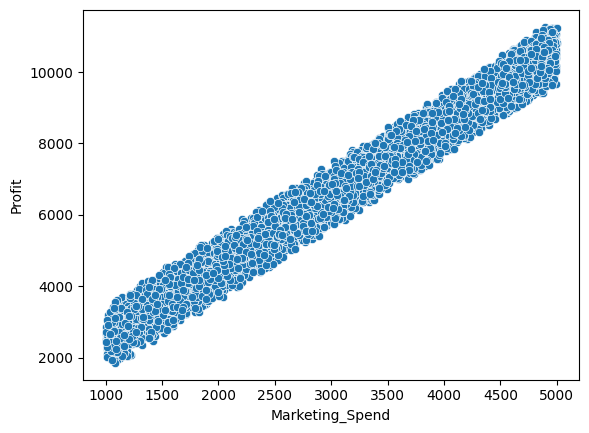

In [ ]:
# Scatter plot of "Marketing_Spend" vs "Profit"
sns.scatterplot(x="Marketing_Spend",y="Profit",data=df)

<Axes: xlabel='Units_Sold'>

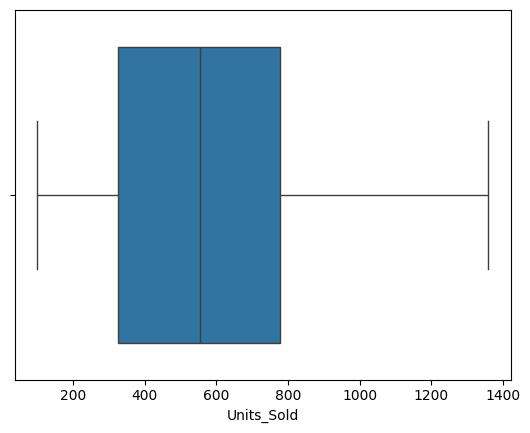

In [ ]:
# Box plot of "Units_Sold"
sns.boxplot(x="Units_Sold",data=df)

<Axes: xlabel='Marketing_Spend'>

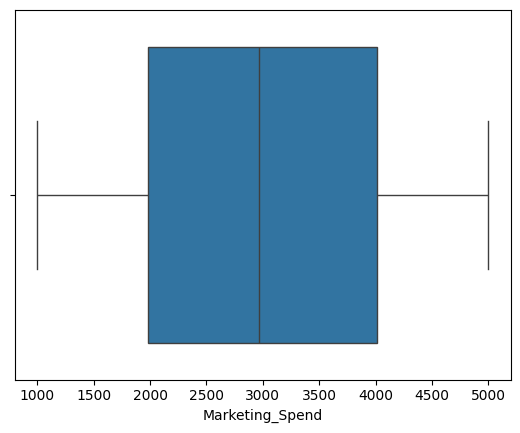

In [ ]:
# Box plot of "Marketing_Spend"
sns.boxplot(x="Marketing_Spend",data=df)

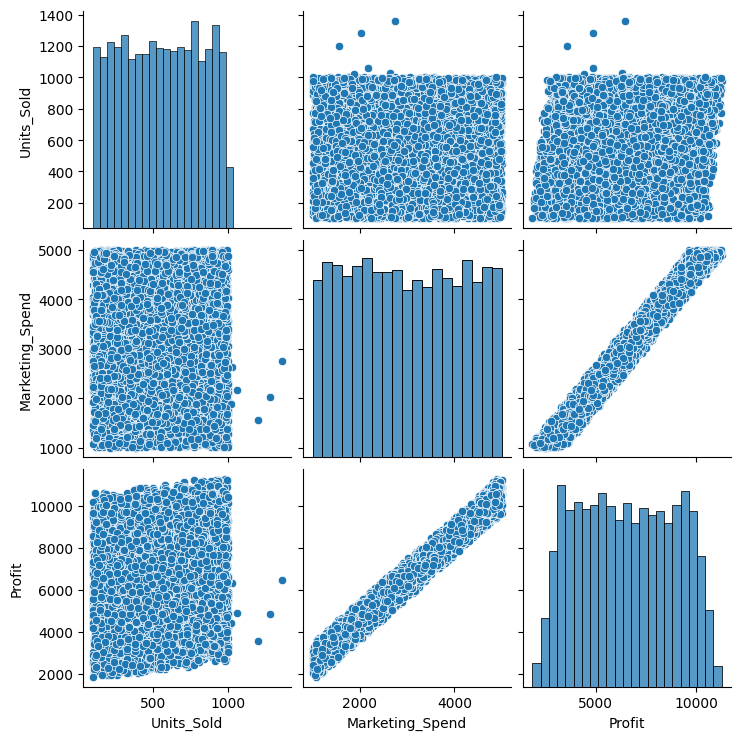

In [ ]:
# Pair plot of the dataset
sns.pairplot(df)

<Axes: >

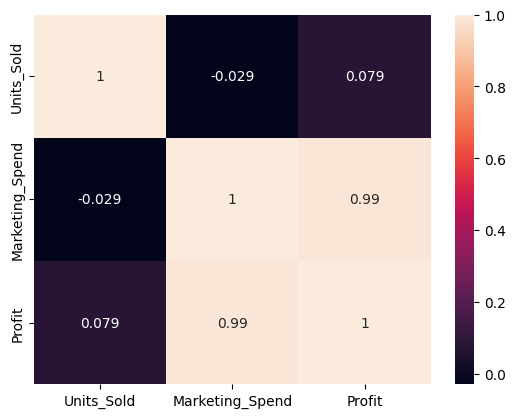

In [ ]:
# Heatmap of the correlation matrix
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Units_Sold', ylabel='Profit'>

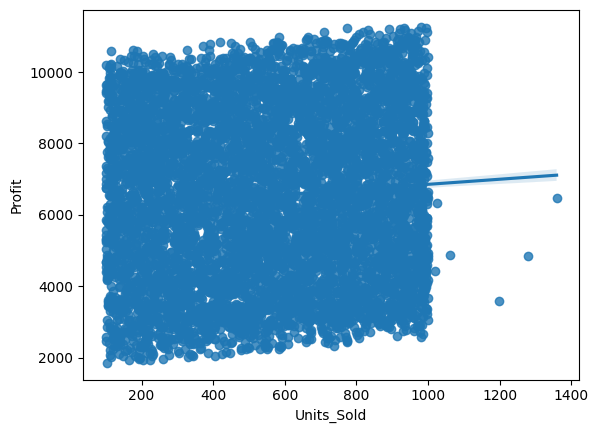

In [ ]:
# Regression plot of "Units_Sold" vs "Profit"
sns.regplot(x="Units_Sold",y="Profit",data=df)

<Axes: xlabel='Marketing_Spend', ylabel='Profit'>

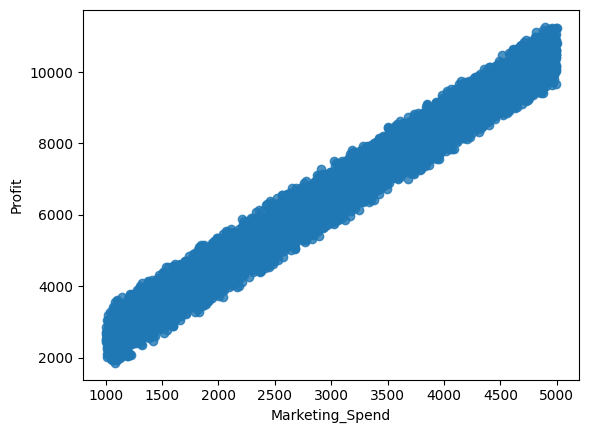

In [ ]:
# Regression plot of "Marketing_Spend" vs "Profit"
sns.regplot(x="Marketing_Spend",y="Profit",data=df)

In [ ]:
df

,Units_Sold,Marketing_Spend,Profit
0,202,4058,8665
1,535,2938,6405
2,960,2573,5643
3,370,3629,7552
4,206,4187,8726
...,...,...,...
6995,633,2169,4768
6996,791,1892,4318
6997,466,1952,4378
6998,940,2254,5298


In [ ]:
# Define features and target variable
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [ ]:
x

,Units_Sold,Marketing_Spend
0,202,4058
1,535,2938
2,960,2573
3,370,3629
4,206,4187
...,...,...
6995,633,2169
6996,791,1892
6997,466,1952
6998,940,2254


In [ ]:
y

0       8665
1       6405
2       5643
3       7552
4       8726
        ... 
6995    4768
6996    4318
6997    4378
6998    5298
6999    4174
Name: Profit, Length: 7000, dtype: int64

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
x_train

,Units_Sold,Marketing_Spend
1032,225,1142
6339,427,4870
3886,161,1696
2653,768,2099
6914,175,4938
...,...,...
3772,300,2218
5191,369,1705
5226,982,4442
5390,749,2545


In [ ]:
y_train

1032     2717
6339    10391
3886     3582
2653     5229
6914    10252
        ...  
3772     4791
5191     4070
5226     9811
5390     5506
860      3134
Name: Profit, Length: 5600, dtype: int64

In [ ]:
y_test

6500    9552
2944    5201
2024    3571
263     2499
4350    5003
        ... 
3484    8029
1860    7806
4974    3509
387     3390
4336    7539
Name: Profit, Length: 1400, dtype: int64

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [ ]:
x_test=scaler.transform(x_test)

In [ ]:
x_test

array([[ 0.06668922,  1.27870541],
       [ 0.10880714, -0.51299305],
       [-1.00923222, -1.06945324],
       ...,
       [-1.5835675 , -1.09960201],
       [-1.22365072, -1.07806717],
       [-1.42658253,  0.71449267]])

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred=model.predict(x_test)

In [ ]:
# Calculate the R^2 score
r2_score(y_test,y_pred)

0.9848586519353181

In [ ]:
# prompt: take a input from user and finde the Accuracy

# Get user input for features
user_input = []
for feature in x.columns:
  value = float(input(f"Enter value for {feature}: "))
  user_input.append(value)

# Reshape and scale user input
user_input = np.array(user_input).reshape(1, -1)
user_input_scaled = scaler.transform(user_input)

# Predict profit for user input
predicted_profit = model.predict(user_input_scaled)

print(f"Predicted Profit: {predicted_profit[0]}")

# Note: Accuracy is not a relevant metric for regression problems.
# This code provides a profit prediction based on user input.
# To evaluate the model's performance, consider metrics like R^2 score,
# mean squared error, or mean absolute error.


Enter value for Units_Sold: 202
Enter value for Marketing_Spend: 4058
Predicted Profit: 8392.2


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#postpruning technique
treemodel=DecisionTreeRegressor(max_depth=2)
treemodel

DecisionTreeRegressor(max_depth=2)

In [ ]:
# Train the model
treemodel.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.059\nsquared_error = 5521974.547\nsamples = 5600\nvalue = 6540.336'),
 Text(0.25, 0.5, 'x[1] <= -0.908\nsquared_error = 1524513.526\nsamples = 2915\nvalue = 4604.317'),
 Text(0.125, 0.16666666666666666, 'squared_error = 431807.509\nsamples = 1344\nvalue = 3503.746'),
 Text(0.375, 0.16666666666666666, 'squared_error = 536586.631\nsamples = 1571\nvalue = 5545.862'),
 Text(0.75, 0.5, 'x[1] <= 0.917\nsquared_error = 1374803.878\nsamples = 2685\nvalue = 8642.196'),
 Text(0.625, 0.16666666666666666, 'squared_error = 448821.459\nsamples = 1349\nvalue = 7680.179'),
 Text(0.875, 0.16666666666666666, 'squared_error = 431736.96\nsamples = 1336\nvalue = 9613.575')]

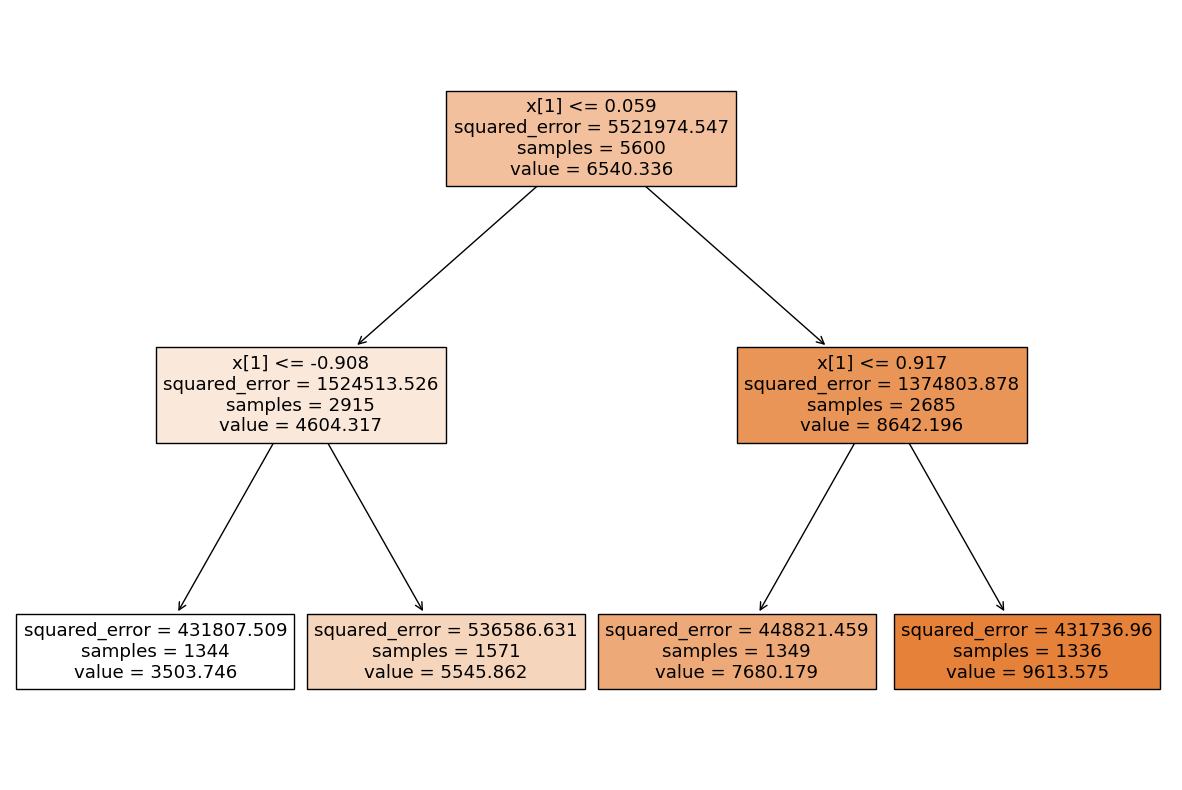

In [ ]:
#constructing tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [ ]:
#post-pruning technique
treemodel=DecisionTreeRegressor()
treemodel

DecisionTreeRegressor()

In [ ]:
# Train the model
treemodel.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
# Predict on the test set
y_pred = treemodel.predict(x_test)
y_pred

array([9373., 5085., 4147., ..., 3707., 3717., 8216.])

In [ ]:
# Calculate the R^2 score
from sklearn.metrics import r2_score

In [ ]:
score = r2_score(y_pred,y_test)
print(score)

0.969236734695686


In [ ]:
# Hyperparameter tuning for Decision Tree Regressor
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'splitter': ['best', 'random']
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
treemodel=DecisionTreeRegressor()
cv=RandomizedSearchCV(treemodel,param_distributions=param_grid,cv=5)

In [ ]:
cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'splitter': ['best', 'random']})

In [ ]:
cv.best_params_

{'splitter': 'best',
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': None}

In [ ]:
# Predict on the test set with the best model
cv.predict(x_test)

array([9618.52631579, 5198.61538462, 3903.5       , ..., 3644.23529412,
       3644.23529412, 7758.3       ])

In [ ]:
y_pred=cv.predict(x_test)

In [ ]:
# Calculate the R^2 score
from sklearn.metrics import r2_score

In [ ]:
# Calculate the R^2 score
score = r2_score(y_pred,y_test)
print(score)

0.9816154104992919


In [ ]:


# Get user input for features
user_input = []
for feature in x.columns:
  value = float(input(f"Enter value for {feature}: "))
  user_input.append(value)

# Reshape and scale user input
user_input = np.array(user_input).reshape(1, -1)
user_input_scaled = scaler.transform(user_input)

# Predict profit for user input
predicted_profit = cv.predict(user_input_scaled)

print(f"Predicted Profit: {predicted_profit[0]}")

# Note: Accuracy is not a relevant metric for regression problems.
# This code provides a profit prediction based on user input.
# To evaluate the model's performance, consider metrics like R^2 score,
# mean squared error, or mean absolute error.


Enter value for Units_Sold: 202
Enter value for Marketing_Spend: 4058
Predicted Profit: 8343.219409058604


## Random Forest Regressor



In [ ]:
fit_rf=RandomForestRegressor(random_state=42)

In [ ]:
# Hyperparameter tuning for Random Forest Regressor
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
treemodel=RandomForestRegressor()
cv=RandomizedSearchCV(treemodel,param_distributions=param_grid,cv=5)

In [ ]:
# Train the model with the best hyperparameters
cv.fit(x_train,y_train)
cv.best_params_

# Predict on the test set with the best model
cv.predict(x_test)
y_pred=cv.predict(x_test)

# Calculate the R^2 score
score = r2_score(y_pred,y_test)
print(score)


0.9824806048343375


##**Kneighbors Regressor**


In [ ]:
# prompt: Kneighbors Regressor apply

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5) # You can adjust n_neighbors
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
score = r2_score(y_pred, y_test)
print(score)


0.9808817517613556


In [ ]:


data = {'Algorithm': ['Linear Regression', 'Decision Tree', 'Random Forest', 'K Neighbors Regressor'],
        'R^2 Score': [r2_score(y_test, model.predict(x_test)),
                      score,  # Assuming 'score' is the R^2 score from Random Forest
                      r2_score(y_test, cv.predict(x_test)),
                      r2_score(y_test, knn.predict(x_test))]}

df_results = pd.DataFrame(data)
df_results


,Algorithm,R^2 Score
0,Linear Regression,0.984859
1,Decision Tree,0.980882
2,Random Forest,0.982972
3,K Neighbors Regressor,0.981076


In [ ]:
# prompt: create the tabular daraframe all algo

data = {'Algorithm': ['Linear Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors'],
        'R^2 Score': [r2_score(y_test, model.predict(x_test)),
                      r2_score(y_test, cv.predict(x_test)),  # Assuming 'cv' is the best RandomForestRegressor
                      r2_score(y_test, cv.predict(x_test)),  # Assuming 'cv' is the best DecisionTreeRegressor
                      r2_score(y_test, knn.predict(x_test))]}

df_results = pd.DataFrame(data)
print(df_results)


             Algorithm  R^2 Score
0    Linear Regression   0.984859
1        Decision Tree   0.982972
2        Random Forest   0.982972
3  K-Nearest Neighbors   0.981076
